# 1. Using OpenAlex to find taxonomists

## 1.3. Visualizing selected articles with wordclouds

Using words from the abstract.

In [9]:
from wordcloud import WordCloud, STOPWORDS
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# exclude additional words from wordclouds
stopwords = STOPWORDS
stopwords.update(["one", "two", "three", "four", "five", "et"]
                 +list("abcdefghijklmnopqrstuvwxyz1234567890.,;"))

In [6]:
def wordcloud_abstracts(df, name):
    abstract_words = df["abstract_inverted_index"]
    abstract_words = list(filter(None, abstract_words))
    
    frequencies = {}
    
    for pub in abstract_words:
        for word, indices in pub.items():
            word = word.strip(".")
            # add new word to frequencies
            if word in frequencies:
                frequencies[word] += len(indices)
            # add new words that are not stopwords
            elif word.lower() not in stopwords: 
                frequencies[word] = len(indices)
    
    # make wordcloud of abstract word frequencies
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").fit_words(frequencies)

    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    # save wordcloud for this concept
    plt.savefig("./figures/wordcloud_"+name+".png", format="png")

    plt.show()

In [5]:
articles = pd.read_pickle("./data/keyword_filtered_articles_EU27_with_taxonomy_concept_in_journal.pkl")
articles

,id,doi,title,display_name,publication_year,publication_date,ids,primary_location,host_venue,type,...,alternate_host_venues,referenced_works,related_works,ngrams_url,abstract_inverted_index,cited_by_api_url,counts_by_year,updated_date,created_date,is_authors_truncated
0,https://openalex.org/W2598914299,https://doi.org/10.11646/bionomina.11.1.1,<p><strong>The nomenclatural status of <em>Hys...,<p><strong>The nomenclatural status of <em>Hys...,2017,2017-03-04,{'openalex': 'https://openalex.org/W2598914299...,"{'is_oa': None, 'landing_page_url': 'https://d...","{'id': 'https://openalex.org/S4210230724', 'is...",journal-article,...,"[{'id': 'https://openalex.org/S4210230724', 'd...",[],"[https://openalex.org/W26558877, https://opena...",https://api.openalex.org/works/W2598914299/ngrams,"{'Dozens': [0], 'of': [1, 18, 43, 45, 64, 72, ...",https://api.openalex.org/works?filter=cites:W2...,"[{'year': 2022, 'cited_by_count': 2}, {'year':...",2023-02-23T21:36:09.799334,2017-04-07,NaN
1,https://openalex.org/W2555892112,https://doi.org/10.11646/bionomina.10.1.1,"&lt;p&gt;&lt;strong&gt;Classes, taxa and categ...","&lt;p&gt;&lt;strong&gt;Classes, taxa and categ...",2016,2016-11-10,{'openalex': 'https://openalex.org/W2555892112...,"{'is_oa': True, 'landing_page_url': 'https://d...","{'id': 'https://openalex.org/S4210230724', 'is...",journal-article,...,"[{'id': 'https://openalex.org/S4210230724', 'd...","[https://openalex.org/W6974918, https://openal...","[https://openalex.org/W26558877, https://opena...",https://api.openalex.org/works/W2555892112/ngrams,"{'The': [0, 25, 241, 583], 'species': [1, 30, ...",https://api.openalex.org/works?filter=cites:W2...,"[{'year': 2022, 'cited_by_count': 2}, {'year':...",2023-02-21T12:07:31.454306,2016-11-30,NaN
2,https://openalex.org/W2597855587,https://doi.org/10.11646/bionomina.12.1.2,<strong>The need for reference specimens in zo...,<strong>The need for reference specimens in zo...,2017,2017-03-24,{'openalex': 'https://openalex.org/W2597855587...,"{'is_oa': None, 'landing_page_url': 'https://d...","{'id': 'https://openalex.org/S4210230724', 'is...",journal-article,...,"[{'id': 'https://openalex.org/S4210230724', 'd...",[],"[https://openalex.org/W2315760709, https://ope...",https://api.openalex.org/works/W2597855587/ngrams,"{'A': [0], 'debate': [1], 'is': [2, 9, 94, 101...",https://api.openalex.org/works?filter=cites:W2...,"[{'year': 2022, 'cited_by_count': 2}, {'year':...",2023-03-02T02:34:20.414492,2017-04-07,NaN
3,https://openalex.org/W2611147945,https://doi.org/10.11646/bionomina.12.1.8,&lt;strong&gt;Diagnoses in zoological taxonomy...,&lt;strong&gt;Diagnoses in zoological taxonomy...,2017,2017-03-24,{'openalex': 'https://openalex.org/W2611147945...,"{'is_oa': None, 'landing_page_url': 'https://d...","{'id': 'https://openalex.org/S4210230724', 'is...",journal-article,...,"[{'id': 'https://openalex.org/S4210230724', 'd...",[],"[https://openalex.org/W1977074375, https://ope...",https://api.openalex.org/works/W2611147945/ngrams,"{'The': [0, 26], 'use': [1, 44, 97], 'of': [2,...",https://api.openalex.org/works?filter=cites:W2...,"[{'year': 2022, 'cited_by_count': 4}, {'year':...",2023-02-27T23:25:06.093812,2017-05-12,NaN
4,https://openalex.org/W2996133267,https://doi.org/10.11646/bionomina.17.1.1,"<p align=""left""><strong>The Linz <em>Zoocode</...","<p align=""left""><strong>The Linz <em>Zoocode</...",2019,2019-12-17,{'openalex': 'https://openalex.org/W2996133267...,"{'is_oa': True, 'landing_page_url': 'https://d...","{'id': 'https://openalex.org/S4210230724', 'is...",journal-article,...,"[{'id': 'https://openalex.org/S4210230724', 'd...",[],"[https://openalex.org/W844779971, https://open...",https://api.openalex.org/works/W2996133267/ngrams,"{'In': [0], 'July': [1], '2014,': [2], 'the': ...",https://api.openalex.org/works?filter=cites:W2...,"[{'year': 2021, 'cited_by_count': 5}, {'year':...",2023-02-16T19:26:42.400286,2019-12-26,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

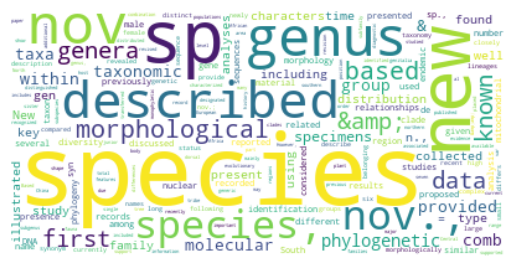

In [10]:
wordcloud_abstracts(articles, "keyword_filtered_articles_EU27_with_taxonomy_concept_in_journal")